In [67]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from matplotlib import image as img
from skimage import io
import cv2

# images
high_contrast = io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.viewbug.com%2Fmedia%2Fmediafiles%2F2015%2F07%2F16%2F56733155_large.jpg&f=1&nofb=1')
low_contrast = io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.ellenborggreve.com%2Fimg%2Fs%2Fv-10%2Fp2219651326-4.jpg&f=1&nofb=1')
high_detailed = io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.sciencealert.com%2Fimages%2F2020-10%2Fprocessed%2Fwestern-wall_1024.jpg&f=1&nofb=1')
low_detailed = io.imread('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fopenclipart.org%2Fimage%2F2400px%2Fsvg_to_png%2F279988%2FLowDetailGlobe.png&f=1&nofb=1')

In [68]:
def histogram_contrast_increase(img: np.ndarray, **parameters) -> np.ndarray:
    a, s, t = parameters.values()
    assert 0 < a < 1, "\'a\' should be between 0 and 1"
    assert 1 <= s <= 255, "\'s\' should be between 1 and 255"
    assert 1 <= t <= 3, "\'t\' should be between 1 and 3"
    result_img = deepcopy(img)
    w, h, d = img.shape
    for x in range(w):
        for y in range(h):
            r, g, b = img[x][y]
            new_r = a * (r - s) + t
            new_g = a * (g - s) + t
            new_b = a * (b - s) + t
            result_img[x][y] = (
                min(255, new_r) if new_r > 0 else 0,
                min(255, new_g) if new_g > 0 else 0,
                min(255, new_b) if new_b > 0 else 0,
            )
    return result_img

In [85]:
def plot_images(original, filtered) -> None:
    fig, axes = plt.subplots(2, 2, figsize=(15,15))
    axes[0, 0].imshow(original)
    axes[0, 0].set_title('Original', fontsize=12)
    axes[0, 1].imshow(filtered)
    axes[0, 1].set_title('Filtered image', fontsize=12)
    
    color = ('b','g','r')
    for i, col in enumerate(color):
      h1 = cv2.calcHist([original], [i], None, [256], [0, 256])
      axes[1, 0].plot(h1, color=col)
    axes[1, 0].set_xlim(0, 250)
    axes[1, 0].set_title('hist original')
    for i, col in enumerate(color):
      h2 = cv2.calcHist([filtered], [i], None, [256], [0, 256])
      axes[1, 1].plot(h2, color=col)
    axes[1, 1].set_xlim(0, 250)
    axes[1, 1].set_title('hist filtered')
  
    plt.show()

def plot_hist(original, filtered):
  from skimage import exposure
  (fig, axs) =  plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

  for (i, image) in enumerate((original, filtered)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for (j, color) in enumerate(("red", "green", "blue")):
      (hist, bins) = exposure.histogram(image[..., j],
        source_range="dtype")
      axs[j, i].plot(bins, hist / hist.max())
      (cdf, bins) = exposure.cumulative_distribution(image[..., j])
      axs[j, i].plot(bins, cdf)
      axs[j, 0].set_ylabel(color)
  plt.tight_layout()
  plt.show()

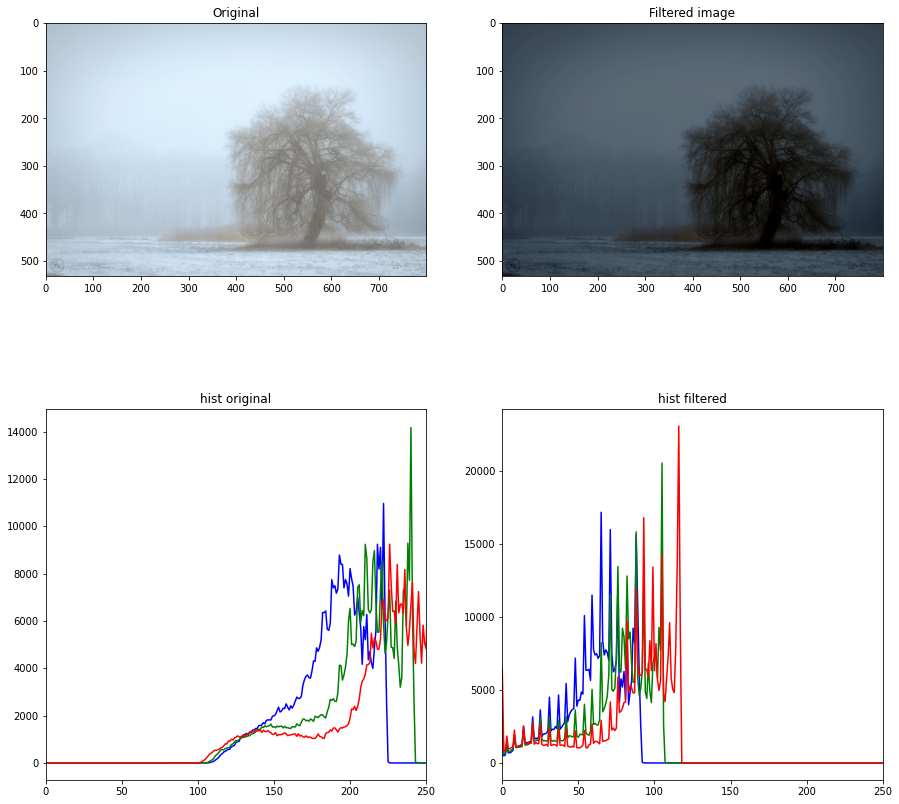

In [91]:
filtered_image = histogram_contrast_increase(low_contrast, a=0.85, s=120, t=3)
plot_images(low_contrast, filtered_image)

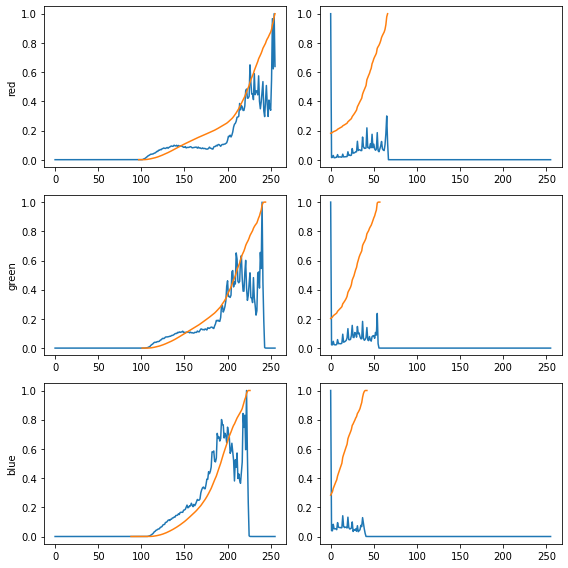

In [90]:
plot_hist(low_contrast, filtered_image)

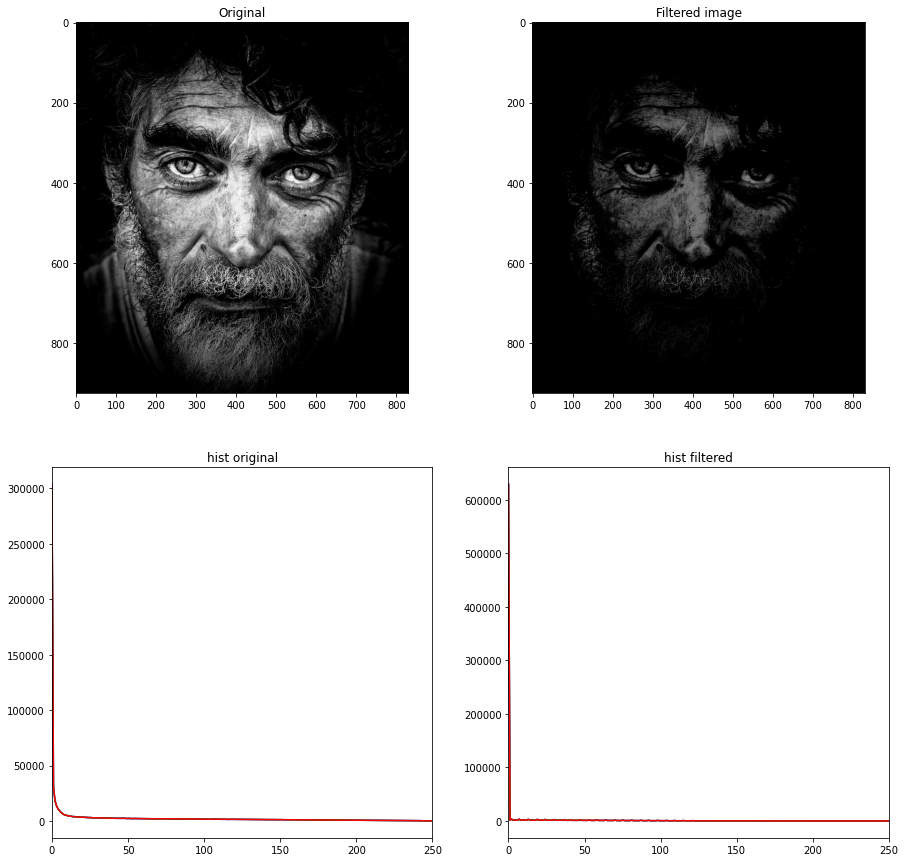

In [83]:
filtered_image = histogram_contrast_increase(high_contrast, a=0.85, s=100, t=2)
plot_images(high_contrast, filtered_image)